Feature matrix (x_train): (60000, 28, 28)
Target matrix (y_train): (60000,)
Feature matrix (x_test): (10000, 28, 28)
Target matrix (y_test): (10000,)


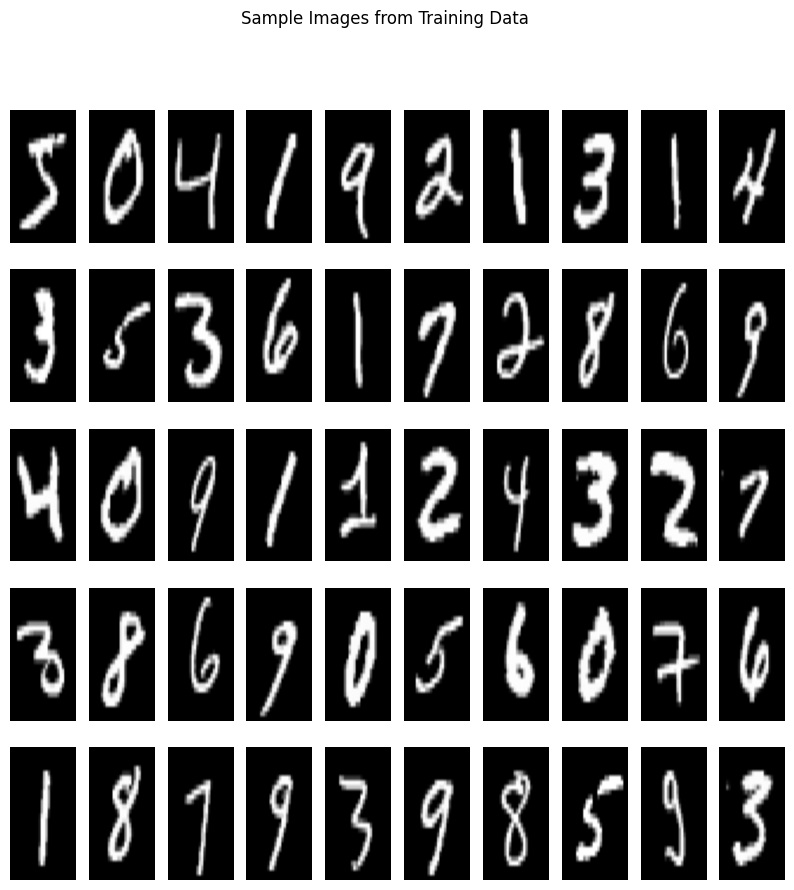

/usr/local/lib/python3.11/dist-packages/keras/src/layers/reshaping/flatten.py:37: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.6766 - loss: 1.3226 - val_accuracy: 0.8966 - val_loss: 0.3980
Epoch 2/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.8965 - loss: 0.3881 - val_accuracy: 0.9161 - val_loss: 0.3080
Epoch 3/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 9s 6ms/step - accuracy: 0.9125 - loss: 0.3122 - val_accuracy: 0.9251 - val_loss: 0.2672
Epoch 4/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9240 - loss: 0.2720 - val_accuracy: 0.9328 - val_loss: 0.2402
Epoch 5/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 8s 6ms/step - accuracy: 0.9298 - loss: 0.2512 - val_accuracy: 0.9371 - val_loss: 0.2217
Epoch 6/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 7s 5ms/step - accuracy: 0.9364 - loss: 0.2235 - val_accuracy: 0.9434 - val_loss: 0.2060
Epoch 7/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 10s 5ms/step - accuracy: 0.9400 - loss: 0.2100 - val_accuracy: 0.9457 - val_loss: 0.1931
Epoch 8/10
1500/1500 ━━━━━━━━━━━━━━━━━━━━ 11s 5ms/step - accuracy: 0.9446 - loss: 0.1921 

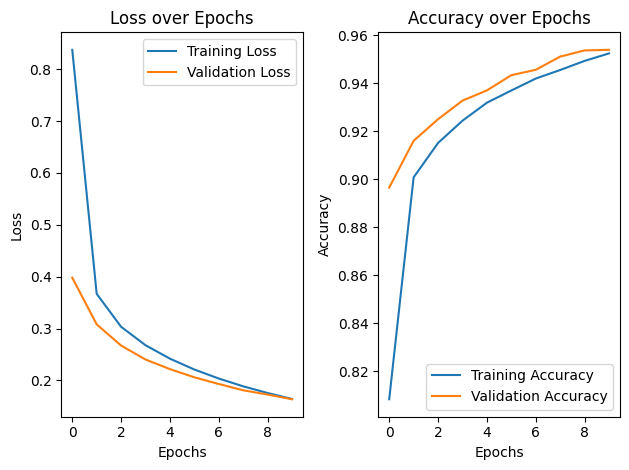

Test Loss: 0.16186198592185974
Test Accuracy: 0.953499972820282
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step
Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.98      0.97       980
           1       0.98      0.98      0.98      1135
           2       0.94      0.96      0.95      1032
           3       0.95      0.94      0.94      1010
           4       0.94      0.96      0.95       982
           5       0.95      0.93      0.94       892
           6       0.95      0.96      0.96       958
           7       0.95      0.95      0.95      1028
           8       0.93      0.94      0.94       974
           9       0.96      0.92      0.94      1009

    accuracy                           0.95     10000
   macro avg       0.95      0.95      0.95     10000
weighted avg       0.95      0.95      0.95     10000



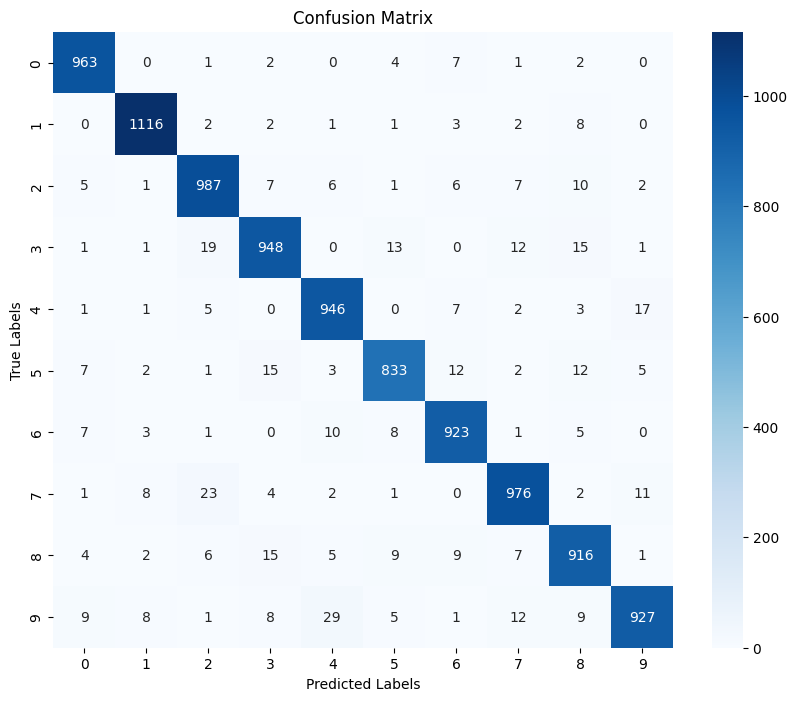

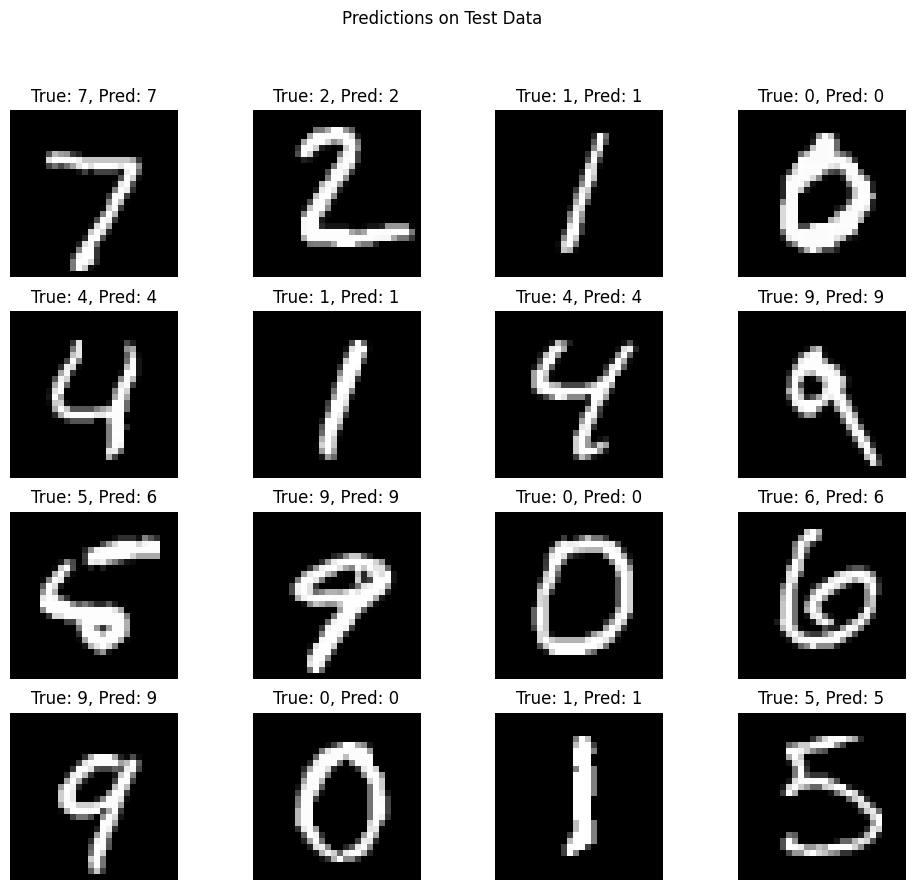

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import ssl
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import Adagrad

# Fix SSL certificate issues
ssl._create_default_https_context = ssl._create_unverified_context

# Load MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize image pixel values by dividing by 255 (grayscale)
gray_scale = 255
x_train = x_train.astype('float32') / gray_scale
x_test = x_test.astype('float32') / gray_scale

# Checking the shape of feature and target matrices
print("Feature matrix (x_train):", x_train.shape)
print("Target matrix (y_train):", y_train.shape)
print("Feature matrix (x_test):", x_test.shape)
print("Target matrix (y_test):", y_test.shape)

# Visualizing 50 images from the training data
fig, ax = plt.subplots(5, 10, figsize=(10, 10))
fig.suptitle('Sample Images from Training Data')
k = 0
for i in range(5):
    for j in range(10):
        ax[i][j].imshow(x_train[k].reshape(28, 28), cmap="gray", aspect='auto')
        ax[i][j].axis('off')
        k += 1
plt.show()

# Building the Sequential neural network model
model = Sequential([
    Flatten(input_shape=(28, 28)),  # Flatten input from 28x28 to 784
    Dense(256, activation='relu'),  # Dense layer 1 (256 neurons)
    Dense(128, activation='sigmoid'),  # Dense layer 2 (128 neurons)
    Dense(10, activation='softmax')  # Output layer (10 classes)
])

# Compiling the model
model.compile(optimizer=Adagrad(learning_rate=0.01),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

history = model.fit(x_train, y_train, validation_split=0.2, epochs=10, batch_size=32)

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Loss over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.tight_layout()
plt.show()

# Evaluating the model on test data
results = model.evaluate(x_test, y_test, verbose=0)
print('Test Loss:', results[0])
print('Test Accuracy:', results[1])

# Predicting on test data
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)

# Classification report
print("Classification Report:")
print(classification_report(y_test, y_pred_classes))

# Confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred_classes)
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

# Visualizing predictions
fig, ax = plt.subplots(4, 4, figsize=(12, 10))
fig.suptitle("Predictions on Test Data")
k = 0
for i in range(4):
    for j in range(4):
        ax[i][j].imshow(x_test[k].reshape(28, 28), cmap='gray')
        ax[i][j].set_title(f"True: {y_test[k]}, Pred: {y_pred_classes[k]}")
        ax[i][j].axis('off')
        k += 1
plt.show()
